<a href="https://colab.research.google.com/github/sahilrahman12/The-Sparks-Foundartion/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - To Explore Supervised Machine Learning

## Problem Statement: What will be predicted score if a student study for 9.25 hrs in a day?

### **Importing the required libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Reading the dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

### **Printing the first 5 datapoints**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Using the describe() function to get more knowledge about the dataset**

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Checking for the null values**

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### **Plotting the graph to see the correlation between the Hours and Scores**
 - From the result, we can conclude that there is a high positive correlation between the variables "Hours" and "Scores"

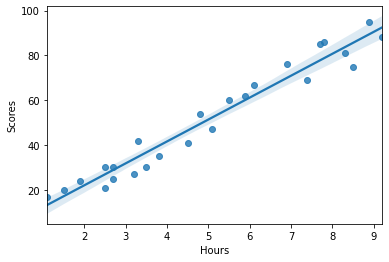

In [6]:
sns.regplot(df.Hours, df.Scores)

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Setting the Features to the variable "x' and Target to the variable "y", respectively.**

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

### **Choosing the Linear Regression model for the computation**

In [9]:
model = LinearRegression()

### **Splitting the data using train_test_split()**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the model**

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Prediction from the trained model**

In [12]:
pred_y = model.predict(X_test)

### **Forming a dataframe to compare the actual values to the predicted values**

In [13]:
df1 = pd.DataFrame({'Actual values': y_test, 'Predicted values': pred_y})  
df1

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


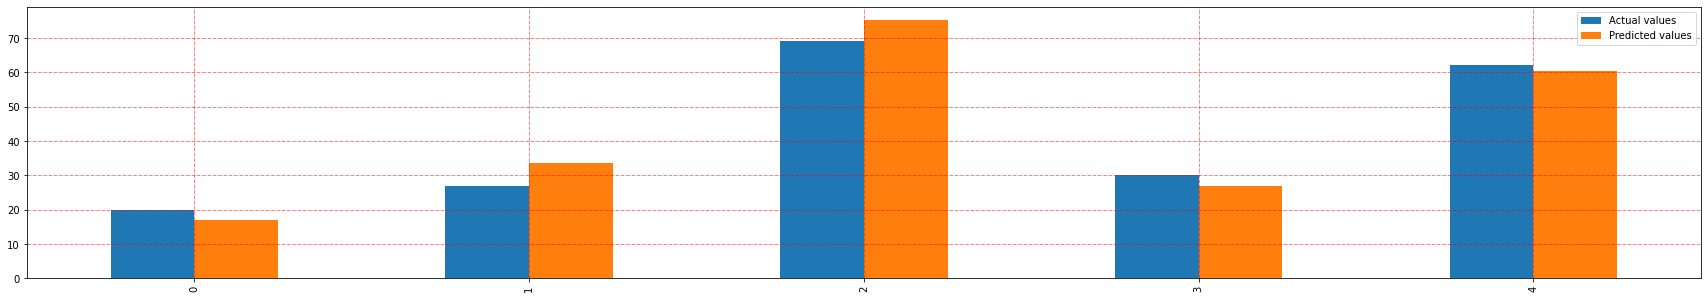

In [14]:
graph = df1.head()
graph.plot(kind='bar',figsize=(30,5))
plt.grid(which = 'both', color='red', linestyle='-.', linewidth=0.5)
plt.show()

### **Checking the accuracy of our model with r2_score**

In [15]:
accuracy = r2_score(y_test,pred_y)
accuracy

0.9454906892105354

### **Testing the model with the given problem statement, i.e. "What will be predicted score if a student study for 9.25 hrs in a day?"**

In [16]:
hour = 9.25
prei = model.predict([[hour]])

print('Predicted Score:', prei)

Predicted Score: [93.69173249]


### **Model evaluation**

In [17]:
MSE = mean_squared_error(y_test, pred_y)
print("The Mean Squared Error is",MSE)

MAE = mean_absolute_error(y_test, pred_y)
print("The Mean Absolute Eror is", MAE)

The Mean Squared Error is 21.598769307217456
The Mean Absolute Eror is 4.183859899002982
